In [1]:
import torch
import torchvision.datasets as dsets
from torchvision import transforms

from collections import OrderedDict

# check device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# set seed for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

torch.__version__, device

('1.7.0+cu101', 'cuda')

In [2]:
def train(data_loader, n_epochs, model, criterion, optimizer):
  total_batch = len(data_loader)
  for epoch in range(n_epochs):
    avg_cost = 0

    for x_train, y_train in data_loader:
      x_train = x_train.view(-1, 28*28).to(device)
      y_train = y_train.to(device)

      hypothesis = model(x_train)
      cost = criterion(hypothesis, y_train)

      optimizer.zero_grad()
      cost.backward()
      avg_cost += cost / total_batch
      optimizer.step()
      
    if epoch%1 == 0:
      print(f'epoch : {epoch:3}  |  cost : {avg_cost:10.6f}')


def test(mnist_test, device, model):
  # compute accuracy
  with torch.no_grad():
    x_test = mnist_test.data.view(-1, 28*28).float().to(device)
    y_test = mnist_test.targets.to(device)

    prediction = model(x_test)
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print('>>> Test Accuracy:', accuracy.item())

## Weight initialization
- Initialization 방식에 따라 학습 속도 및 모델 성능이 달라짐
- Xavier Initialization 을 통해 모델 성능을 개선함
- Hidden layer 수와 layer 당 node 수를 늘린 bigger model 학습

In [3]:
# set parameters
batch_size = 100
n_epochs = 15
learning_rate = 0.001

# prepare data
mnist_train = dsets.MNIST(root='mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='mnist_data/', train=False, transform=transforms.ToTensor(), download=True)
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw


Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
%%time

# generate layers - multiple layer with relu
linear1 = torch.nn.Linear(28*28, 256, bias=True).to(device)
linear2 = torch.nn.Linear(256, 256, bias=True).to(device)
linear3 = torch.nn.Linear(256, 10, bias=True).to(device)
relu = torch.nn.ReLU()

# initialize weights
for layer in [linear1, linear2, linear3]:
  torch.nn.init.xavier_normal_(layer.weight)  # Xavier Initialization

# build model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss().to(device)  # Softmax is internally computed

# train model
train(data_loader, n_epochs, model, criterion, optimizer)

# test model
test(mnist_test, device, model)




epoch :   0  |  cost :   0.240960
epoch :   1  |  cost :   0.093381
epoch :   2  |  cost :   0.061921
epoch :   3  |  cost :   0.045467
epoch :   4  |  cost :   0.031918
epoch :   5  |  cost :   0.026744
epoch :   6  |  cost :   0.021094
epoch :   7  |  cost :   0.019554
epoch :   8  |  cost :   0.016443
epoch :   9  |  cost :   0.013174
epoch :  10  |  cost :   0.013408
epoch :  11  |  cost :   0.011821
epoch :  12  |  cost :   0.010743
epoch :  13  |  cost :   0.009369
epoch :  14  |  cost :   0.007128
>>> Test Accuracy: 0.9801999926567078
CPU times: user 1min 15s, sys: 1.72 s, total: 1min 17s
Wall time: 1min 24s


In [5]:
%%time

# generate layers - larger model
linear1 = torch.nn.Linear(28*28, 512, bias=True).to(device)
linear2 = torch.nn.Linear(512, 512, bias=True).to(device)
linear3 = torch.nn.Linear(512, 512, bias=True).to(device)
linear4 = torch.nn.Linear(512, 512, bias=True).to(device)
linear5 = torch.nn.Linear(512, 10, bias=True).to(device)
relu = torch.nn.ReLU()

# initialize weights
for layer in [linear1, linear2, linear3, linear4, linear5]:
  torch.nn.init.xavier_normal_(layer.weight)  # Xavier Initialization

# build model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3, relu, linear4, relu, linear5)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss().to(device)  # Softmax is internally computed

# train model
train(data_loader, n_epochs, model, criterion, optimizer)

# test model
test(mnist_test, device, model)

epoch :   0  |  cost :   0.211400
epoch :   1  |  cost :   0.089075
epoch :   2  |  cost :   0.064490
epoch :   3  |  cost :   0.048741
epoch :   4  |  cost :   0.040963
epoch :   5  |  cost :   0.034192
epoch :   6  |  cost :   0.029215
epoch :   7  |  cost :   0.026552
epoch :   8  |  cost :   0.023234
epoch :   9  |  cost :   0.022807
epoch :  10  |  cost :   0.017956
epoch :  11  |  cost :   0.017368
epoch :  12  |  cost :   0.018948
epoch :  13  |  cost :   0.014836
epoch :  14  |  cost :   0.016442
>>> Test Accuracy: 0.9809999465942383
CPU times: user 1min 18s, sys: 686 ms, total: 1min 19s
Wall time: 1min 19s


Label: 1
Prediction :  1


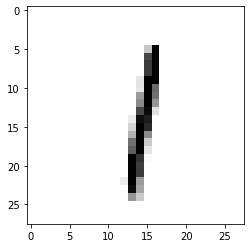




Label: 6
Prediction :  6


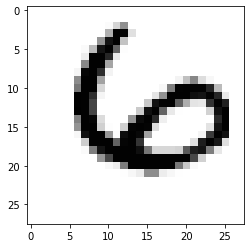




Label: 9
Prediction :  9


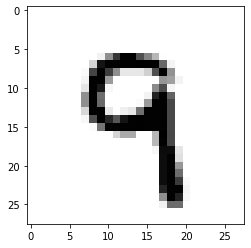




Label: 8
Prediction :  8


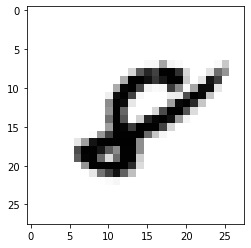




Label: 8
Prediction :  8


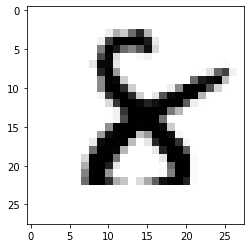

In [6]:
# visualization
import matplotlib.pyplot as plt
import random

for i in range(5):
  r = random.randint(0, len(mnist_test)-1) # 0~9999까지 랜덤한 정수
  X_single_data = mnist_test.data[r].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.targets[r].to(device)

  single_prediction = model(X_single_data)
  print('Label:', Y_single_data.item())
  print('Prediction : ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.data[r].view(28,28), cmap='Greys', interpolation='nearest')
  plt.show()

  print('\n\n')